#  Airplane Risk Analysis for Business Expansion  

## ✈️ Introduction  
As part of a company's diversification strategy, they are exploring the aviation industry. However, operating airplanes come with inherent risks. To make informed investment decisions, they must assess which airplane types pose the **lowest operational risk** based on historical accident data.  

In this project, I will analyze **aviation accident data (1962–2023)** from the National Transportation Safety Board (NTSB) to:  
- **Identify risk factors** associated with airplane accidents.  
- **Determine the safest airplane types** for commercial and private enterprise operations.  
- **Provide actionable insights** to the aviation division for selecting airplane with minimal risk.   


## 🔍 Methodology: Approach to Airplane Risk Analysis

To ensure a **thorough and accurate** assessment of airplane risk, this notebook follows a structured approach:  

### 1️⃣ Data Exploration  
- Load and inspect the dataset to understand its structure and key attributes.  
- Identify missing values, inconsistencies, and potential data quality issues.  

### 2️⃣ Data Cleaning  
- Handle missing values through imputation or removal where necessary.  
- Standardize formats and correct inconsistencies.  
- Filter relevant data to focus on meaningful insights.  

### 3️⃣ Data Visualization & Analysis
- Use charts, graphs, and interactive visualizations to identify trends and patterns in accident occurrences.
- Compare accident rates across different airplane types, years, and other factors.
- Perform basic statistical analysis to uncover patterns in the accident data.
- Interpret visual trends to extract meaningful insights.

### 4️⃣ Business Recommendations  
- Summarize key findings in a clear format.  
- Provide **data-driven recommendations** to the aviation division on the safest airplane for investment.  

## 【1】*Data Exploration*  

In [1]:
# Import pandas with standard alias  
import pandas as pd                 

In [2]:
# Load the dataset and inspect the first few rows
df = pd.read_csv("Data/Aviation_Data.csv")
df.head()

C:\Users\vihaa\AppData\Local\Temp\ipykernel_3228\3669091942.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Data/Aviation_Data.csv")


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


The dataset raised a **DtypeWarning**, meaning some columns contain **mixed data types** (e.g., numbers and text), which can cause issues during analysis; we will address this in the data cleaning stage by inspecting these columns, converting them to appropriate types, and handling inconsistencies.  

As you can see from the output above, this dataset is **very extensive**, containing numerous columns with detailed aviation accident records. However, to effectively answer our **business question**, we must focus only on the most relevant data points. By narrowing down our selection, we ensure that our analysis remains **targeted, efficient, and data-driven** in making a well-informed decision.  



### **Key Columns We Will Use:**

- **`Country`** → Confirms that we are focusing exclusively on **U.S. accidents** as per our business scope.  
- **`Aircraft.Category`** → Ensures we are analyzing **airplanes** only, filtering out other aircraft types.  
- **`Purpose.of.flight`** → Filters for **business flights**, since our company is focused on commercial aviation.  
- **`Make` & `Model`** → Identifies aircraft manufacturers and specific models to compare safety records.  
- **`Event.Date`** → Allows us to analyze accident trends over time.  
- **`Broad.phase.of.flight`** → Helps identify when accidents are most likely to occur (e.g., takeoff, cruise, landing).  
- **`Total.Fatal.Injuries`, `Total.Serious.Injuries`, `Total.Minor.Injuries`, `Total.Uninjured`** → Quantifies accident severity and survivability.  
  
**Note:**  We are assuming the company operates in the **United States**, so we are only interested in accidents that happened within the U.S.. Filtering our dataset this way ensures that our analysis remains relevant and focused on the most applicable data.  
  


In [3]:
# Check the dimensions of the dataset (rows, columns)
df.shape

(90348, 31)

In [4]:
# View a summary of the dataset columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [5]:
# Define the list of relevant columns
relevant_columns = ["Make", "Model", "Event.Date", "Purpose.of.flight", "Broad.phase.of.flight", 
                    "Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries", 
                    "Total.Uninjured", "Aircraft.Category", "Country"]

# Display info for relevant columns
df[relevant_columns].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Make                    88826 non-null  object 
 1   Model                   88797 non-null  object 
 2   Event.Date              88889 non-null  object 
 3   Purpose.of.flight       82697 non-null  object 
 4   Broad.phase.of.flight   61724 non-null  object 
 5   Total.Fatal.Injuries    77488 non-null  float64
 6   Total.Serious.Injuries  76379 non-null  float64
 7   Total.Minor.Injuries    76956 non-null  float64
 8   Total.Uninjured         82977 non-null  float64
 9   Aircraft.Category       32287 non-null  object 
 10  Country                 88663 non-null  object 
dtypes: float64(4), object(7)
memory usage: 7.6+ MB


In [6]:
# View summary statistics for relevant columns
df[relevant_columns].describe()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,77488.000000,76379.000000,76956.000000,82977.000000
mean,0.647855,0.279881,0.357061,5.325440
std,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,2.000000
max,349.000000,161.000000,380.000000,699.000000


### **Data Exploration Conclusion**  

Our dataset contains **90,348** entries, but several key columns have **missing values**, particularly in `Aircraft Category` and `Broad Phase of Flight`. This means we need to handle gaps carefully to avoid losing valuable data.  

*Key Takeaways from This Exploration*:  
- Many records are missing in `aircraft category`, limiting detailed classification.  
- **Injury severity columns** have missing values but mostly contain **zeroes**, which suggests we can reasonably fill gaps with 0.  
- **Flight purpose** is missing for some records, but since we are focused on **business flights**, we will filter accordingly.  
- The dataset includes **non-U.S.** accidents, so we will filter for only **U.S.** incidents to maintain relevance.  

Next, we will clean the data to ensure **accuracy and consistency** for our analysis.




## 【2】*Data Cleaning & Preprocessing*  


###  Why Cleaning Is Necessary?  
- **Ensures Data Accuracy** → Missing values can distort trends and patterns.  
- **Improves Visualization** → Charts and graphs require complete data for meaningful insights.   

To ensure our final insights are reliable and data-driven, we need to properly handle these missing values.  

Here we will:  
✅ Drop columns with excessive missing values.  
✅ Fill or impute missing values where necessary.  
✅ Filter and refine the dataset for meaningful analysis.  

By carefully cleaning the data, we set the foundation for accurate **visualization and decision-making**.


### Filtering For U.S. Accidents 

In [7]:
# Filter the dataframe to include only accidents that occurred in the United States
df_clean = df[df["Country"] == "United States"].copy()

print(f'Number of records before filtering:{df.shape}\nNumber of records after filtering:{df_clean.shape}')

Number of records before filtering:(90348, 31)
Number of records after filtering:(82248, 31)


We filtered the dataset to include only accidents that occurred in the United States. This reduced the number of records from **90,348** to **82,248**, confirming that the filtering worked as expected.


### Filtering For Airplanes 

In [8]:
df_clean[df_clean["Aircraft.Category"] == "Airplane"]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,NaN,NaN,T72,HEARNE MUNICIPAL,...,Personal,NaN,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90328,20221213106455,Accident,WPR23LA065,2022-12-13,"Lewistown, MT",United States,047257N,0109280W,KLWT,Lewiston Municipal Airport,...,NaN,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,14-12-2022
90332,20221215106463,Accident,ERA23LA090,2022-12-14,"San Juan, PR",United States,182724N,0066554W,SIG,FERNANDO LUIS RIBAS DOMINICCI,...,Personal,SKY WEST AVIATION INC TRUSTEE,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90335,20221219106475,Accident,WPR23LA069,2022-12-15,"Wichita, KS",United States,373829N,0972635W,ICT,WICHITA DWIGHT D EISENHOWER NT,...,NaN,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,19-12-2022
90336,20221219106470,Accident,ERA23LA091,2022-12-16,"Brooksville, FL",United States,282825N,0822719W,BKV,BROOKSVILLE-TAMPA BAY RGNL,...,Personal,GERBER RICHARD E,0.0,1.0,0.0,0.0,VMC,NaN,NaN,23-12-2022


Filtering by "Aircraft.Category" reduces records from **82,248 to 24,229**, indicating missing or misclassified data. We need a better approach to accurately filter airplane-related records.

In [9]:
df_clean["Aircraft.Category"].value_counts(dropna=False)

Aircraft.Category
NaN                  54094
Airplane             24229
Helicopter            2723
Glider                 503
Balloon                229
Gyrocraft              172
Weight-Shift           161
Powered Parachute       90
Ultralight              25
WSFT                     9
Unknown                  4
Blimp                    4
Powered-Lift             3
Rocket                   1
ULTR                     1
Name: count, dtype: int64

In [10]:
df["Country"].value_counts(dropna=False)

Country
United States               82248
NaN                          1685
Brazil                        374
Canada                        359
Mexico                        358
                            ...  
Mauritania                      1
Pacific Ocean                   1
Obyan                           1
Guernsey                        1
Turks and Caicos Islands        1
Name: count, Length: 220, dtype: int64

Why did our Airplane filter fail?  

- Filtering for U.S. accidents worked well because **only 1,685 out of 90,348** entries in the "Country" column were missing.  
- In contrast, **54,094 out of 82,248** entries in "Aircraft.Category" are missing—over **65% of the data**.  

Since filtering this way would drop most records, we take a different approach:  
For rows where "Aircraft.Category" is missing, we compare the "Make" column to an **FAA airplane registry** to filter accurately.

In [11]:
FAA_df = pd.read_csv("Data/FAA_Airplane_Registry.csv")

# Extract unique manufacturer names, drop NaN values, and convert to lowercase
airplane_manufacturers = FAA_df["mfr_name"].dropna().str.lower().unique().tolist()
airplane_manufacturers

['999 leasing ii llc',
 'a r b c inc dba lindstrand',
 'ab sportine aviacija',
 'aero commander',
 'aero vodochody',
 'aerofab inc',
 'aerojones aviation usa llc',
 'aeronca',
 'aeropilot s r o',
 'aeroprakt manufacturing sp zoo',
 'aeropro cz s r o',
 'aeros',
 'aerospatiale',
 'aerospatiale/alenia',
 'aerostar international inc',
 'aerotek',
 'aeroworks',
 'agusta spa',
 'agustawestland philadelphia',
 'agustawestland philadelphia co',
 'air fly balonismo e inflaveis',
 'air global jets llc',
 'air res aviation sp z o o',
 'air tractor inc',
 'airborne windsports pty ltd',
 'airbus',
 'airbus canada lp',
 'airbus helicopters',
 'airbus helicopters deutschland',
 'airbus helicopters inc',
 'airbus industrie',
 'airbus s a s',
 'airbus sas',
 'aircraft mfg & development co',
 'albano jr thomas j',
 'alex bantum',
 'alexander schleicher gmbh & co',
 'alisport srl',
 'alisport swiss s a g l',
 'alon',
 'am aviation llc',
 'american',
 'american aviation',
 'american champion aircraft',
 

In [12]:
# Convert the Make column to lowercase for accurate comparability
df_clean["Make"] = df_clean["Make"].str.lower()
df_clean.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [13]:
# Filter for known airplanes based on Aircraft.Category OR Make column
df_clean = df_clean[
    (df_clean["Aircraft.Category"] == "Airplane") |
    (df_clean["Aircraft.Category"].isna() & df_clean["Make"].isin(airplane_manufacturers))
].copy()
df_clean

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


By using the FAA registry to identify airplane manufacturers instead of relying solely on the "Aircraft.Category" column, we increase our valid entries from **24,229 to 68,266**.  

This ensures we retain significantly more relevant data while still focusing only on airplanes.  


### Filtering For Business Flights 

In [14]:
df_clean['Purpose.of.flight'].value_counts(dropna=False)

Purpose.of.flight
Personal                     40827
Instructional                 9161
Unknown                       4665
Business                      3387
Aerial Application            3238
NaN                           2007
Positioning                   1167
Other Work Use                 850
Ferry                          600
Public Aircraft                588
Aerial Observation             520
Executive/corporate            442
Flight Test                    266
Skydiving                      166
Banner Tow                     100
Public Aircraft - Federal       62
Air Race show                   61
Glider Tow                      40
Public Aircraft - State         32
Air Race/show                   28
Public Aircraft - Local         19
Firefighting                    16
External Load                   10
ASHO                             6
Air Drop                         5
PUBS                             3
Name: count, dtype: int64

Similar to how we filtered for U.S. accidents, we are now refining our dataset to include only business flights. Since the number of missing values in the Purpose.of.flight column is minimal compared to the total entries, we can filter out rows where this value is missing without significantly impacting our dataset. This ensures that our analysis remains relevant to the business-focused scope of this project.

In [15]:
# Filter the dataframe to include only business flights
df_clean = df[df["Purpose.of.flight"] == "Business"].copy()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4018 entries, 8 to 90326
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                4018 non-null   object 
 1   Investigation.Type      4018 non-null   object 
 2   Accident.Number         4018 non-null   object 
 3   Event.Date              4018 non-null   object 
 4   Location                4017 non-null   object 
 5   Country                 4005 non-null   object 
 6   Latitude                929 non-null    object 
 7   Longitude               929 non-null    object 
 8   Airport.Code            2099 non-null   object 
 9   Airport.Name            2261 non-null   object 
 10  Injury.Severity         4014 non-null   object 
 11  Aircraft.damage         3926 non-null   object 
 12  Aircraft.Category       947 non-null    object 
 13  Registration.Number     3965 non-null   object 
 14  Make                    4018 non-null   obje

### Dropping Irrelevant Columns

In [16]:
# Updating df_clean to keep only the relevant columns
df_clean = df_clean[relevant_columns]

# Verify the updated dataframe structure
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4018 entries, 8 to 90326
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Make                    4018 non-null   object 
 1   Model                   4016 non-null   object 
 2   Event.Date              4018 non-null   object 
 3   Purpose.of.flight       4018 non-null   object 
 4   Broad.phase.of.flight   3373 non-null   object 
 5   Total.Fatal.Injuries    3673 non-null   float64
 6   Total.Serious.Injuries  3589 non-null   float64
 7   Total.Minor.Injuries    3608 non-null   float64
 8   Total.Uninjured         3825 non-null   float64
 9   Aircraft.Category       947 non-null    object 
 10  Country                 4005 non-null   object 
dtypes: float64(4), object(7)
memory usage: 376.7+ KB


In [17]:
# Dropping additional columns that have already served their purpose
df_clean = df_clean.drop(columns=["Country", "Aircraft.Category", "Purpose.of.flight"])
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4018 entries, 8 to 90326
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Make                    4018 non-null   object 
 1   Model                   4016 non-null   object 
 2   Event.Date              4018 non-null   object 
 3   Broad.phase.of.flight   3373 non-null   object 
 4   Total.Fatal.Injuries    3673 non-null   float64
 5   Total.Serious.Injuries  3589 non-null   float64
 6   Total.Minor.Injuries    3608 non-null   float64
 7   Total.Uninjured         3825 non-null   float64
dtypes: float64(4), object(4)
memory usage: 282.5+ KB


### Handling Missing Values

#### *Handling Missing Values in the* `Injuries` *Columns*

In [18]:
df_clean.describe()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,3673.000000,3589.000000,3608.000000,3825.000000
mean,0.629730,0.245472,0.306541,1.691765
std,1.290829,0.717425,0.865980,6.587232
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,2.000000
max,16.000000,13.000000,17.000000,274.000000


*Why are most the quartiles 0?*

The quartiles (25%, 50%, and 75%) are all showing 0.0 probably because a significant number of values in these columns are likely 0. Let's investigate further:

In [19]:
# Check Value Counts
df_clean[["Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Uninjured"]].apply(pd.Series.value_counts)


,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0.0,2609.0,3034.0,2964.0,1479
1.0,438.0,349.0,388.0,980
2.0,316.0,141.0,155.0,674
3.0,165.0,41.0,52.0,268
4.0,76.0,13.0,29.0,174
5.0,31.0,5.0,10.0,95
6.0,19.0,1.0,4.0,48
7.0,3.0,2.0,1.0,31
8.0,8.0,1.0,2.0,22
9.0,1.0,1.0,NaN,17


From this, we observe that the majority of entries in each injury-related column are 0, making it the most common value. Additionally, there are cases where all four columns have values, some have partial values, or only one column is filled. However, rows where all four columns are missing provide no useful information and should be dropped. For all other missing entries, we will replace them with 0.0 to maintain consistency in the dataset.

In [20]:
# Identifying rows where all four injury-related columns have missing values
df_clean[df_clean[["Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Uninjured"]].isnull().all(axis=1)]


,Make,Model,Event.Date,Broad.phase.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
22734,Beech,A80,1989-04-12,NaN,NaN,NaN,NaN,NaN
25479,Bell,222-UT,1990-05-14,NaN,NaN,NaN,NaN,NaN
36331,Hughes,269C,1994-11-02,Standing,NaN,NaN,NaN,NaN
62585,Douglas,DC-3,2007-05-25,NaN,NaN,NaN,NaN,NaN


In [21]:
# Drop rows where all four injury-related columns have missing values
df_clean = df_clean[~df_clean[["Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Uninjured"]].isnull().all(axis=1)]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4014 entries, 8 to 90326
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Make                    4014 non-null   object 
 1   Model                   4012 non-null   object 
 2   Event.Date              4014 non-null   object 
 3   Broad.phase.of.flight   3372 non-null   object 
 4   Total.Fatal.Injuries    3673 non-null   float64
 5   Total.Serious.Injuries  3589 non-null   float64
 6   Total.Minor.Injuries    3608 non-null   float64
 7   Total.Uninjured         3825 non-null   float64
dtypes: float64(4), object(4)
memory usage: 282.2+ KB


In [22]:
# Replace missing values with 0.0 in specific injury-related columns
df_clean.loc[:, ["Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Uninjured"]] = df_clean[["Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Uninjured"]].fillna(0.0)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4014 entries, 8 to 90326
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Make                    4014 non-null   object 
 1   Model                   4012 non-null   object 
 2   Event.Date              4014 non-null   object 
 3   Broad.phase.of.flight   3372 non-null   object 
 4   Total.Fatal.Injuries    4014 non-null   float64
 5   Total.Serious.Injuries  4014 non-null   float64
 6   Total.Minor.Injuries    4014 non-null   float64
 7   Total.Uninjured         4014 non-null   float64
dtypes: float64(4), object(4)
memory usage: 282.2+ KB


Since the most common value in the injury columns is 0, it is reasonable to assume that missing values likely represent cases with no reported injuries. By replacing them with 0, we maintain the dataset's accuracy while preventing unnecessary data loss.

#### *Handling Missing Values in the* `Make` and `Model` *Columns*

We’ve encountered an edge case where rows categorized as "airplane" may have missing values in either the `Make` or `Model` column, yet were retained. These rows don’t add value to the analysis, as knowing the category without `Make` or `Model` isn’t useful for answering the business question. Therefore, we decided to drop rows with missing values in these columns to ensure our dataset remains complete and relevant.


In [23]:
# Drop rows where either the 'Make' or 'Model' column has missing values
df_clean = df_clean.dropna(subset=["Make", "Model"])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4012 entries, 8 to 90326
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Make                    4012 non-null   object 
 1   Model                   4012 non-null   object 
 2   Event.Date              4012 non-null   object 
 3   Broad.phase.of.flight   3371 non-null   object 
 4   Total.Fatal.Injuries    4012 non-null   float64
 5   Total.Serious.Injuries  4012 non-null   float64
 6   Total.Minor.Injuries    4012 non-null   float64
 7   Total.Uninjured         4012 non-null   float64
dtypes: float64(4), object(4)
memory usage: 282.1+ KB


#### *Extracting and Storing Event Years*
Storing `Event.Date` as datetime objects rather than plain strings provides greater flexibility for data analysis. With datetime, we can easily extract specific components like years, months, or days, and efficiently filter or group data. In this case, we are only interested in the year of each event because our analysis focuses on long-term trends rather than individual dates. By extracting only the year, we reduce unnecessary detail, making visualizations clearer and more interpretable while maintaining the essential chronological context.


In [24]:
# Convert Event.Date column to datetime format
df_clean["Event.Date"] = pd.to_datetime(df_clean["Event.Date"], format="%Y-%m-%d")
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4012 entries, 8 to 90326
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Make                    4012 non-null   object        
 1   Model                   4012 non-null   object        
 2   Event.Date              4012 non-null   datetime64[ns]
 3   Broad.phase.of.flight   3371 non-null   object        
 4   Total.Fatal.Injuries    4012 non-null   float64       
 5   Total.Serious.Injuries  4012 non-null   float64       
 6   Total.Minor.Injuries    4012 non-null   float64       
 7   Total.Uninjured         4012 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 282.1+ KB


In [25]:
# Extract the year from Event.Date and store it in a new column
df_clean["Event.Year"] = df_clean["Event.Date"].dt.year
df_clean.head()

,Make,Model,Event.Date,Broad.phase.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Event.Year
8,Cessna,401B,1982-01-01,Landing,0.0,0.0,0.0,2.0,1982
25,Cessna,414A,1982-01-03,Approach,8.0,0.0,0.0,0.0,1982
36,Cessna,206,1982-01-04,Taxi,1.0,0.0,1.0,0.0,1982
37,Navion,A,1982-01-05,Cruise,3.0,0.0,0.0,0.0,1982
40,Rockwell,114,1982-01-05,Cruise,0.0,0.0,0.0,1.0,1982


In [26]:
# Remove the 'Event.Date' column as we now have 'Event.Year'
df_clean.drop(columns=["Event.Date"], inplace=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4012 entries, 8 to 90326
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Make                    4012 non-null   object 
 1   Model                   4012 non-null   object 
 2   Broad.phase.of.flight   3371 non-null   object 
 3   Total.Fatal.Injuries    4012 non-null   float64
 4   Total.Serious.Injuries  4012 non-null   float64
 5   Total.Minor.Injuries    4012 non-null   float64
 6   Total.Uninjured         4012 non-null   float64
 7   Event.Year              4012 non-null   int32  
dtypes: float64(4), int32(1), object(3)
memory usage: 266.4+ KB


#### *Handling Missing Values in the* `Broad.phase.of.flight`*Column*  

The `Broad.phase.of.flight` column contains missing values, but dropping these rows entirely would result in losing valuable data across other key metrics, such as aircraft make, model, and injury counts. Since our primary goal is to assess accident trends comprehensively, removing these rows would reduce the reliability of our dataset.  

However, `Broad.phase.of.flight` remains important for analyzing **fatality proportions by phase of flight**. To maintain accuracy without compromising our full dataset, we will:  
- Keep the missing values in `df_clean` to preserve all relevant accident records.  
- Create a separate dataframe containing only records where `Broad.phase.of.flight` is available for specific analyses.  

This approach ensures that we retain a complete dataset for general risk analysis while still enabling focused insights on accident trends by flight phase when needed.  


In [27]:
# Create a copy of df_clean with rows removed where Broad.phase.of.flight is missing  
df_clean_phase = df_clean.dropna(subset=["Broad.phase.of.flight"]).copy()
print(f'Shape of all filtered accident records:{df_clean.shape}\nShape of phase filtered accident records:{df_clean_phase.shape}')

Shape of all filtered accident records:(4012, 8)
Shape of phase filtered accident records:(3371, 8)


## 【3】*Data Visualization & Analysis*  

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

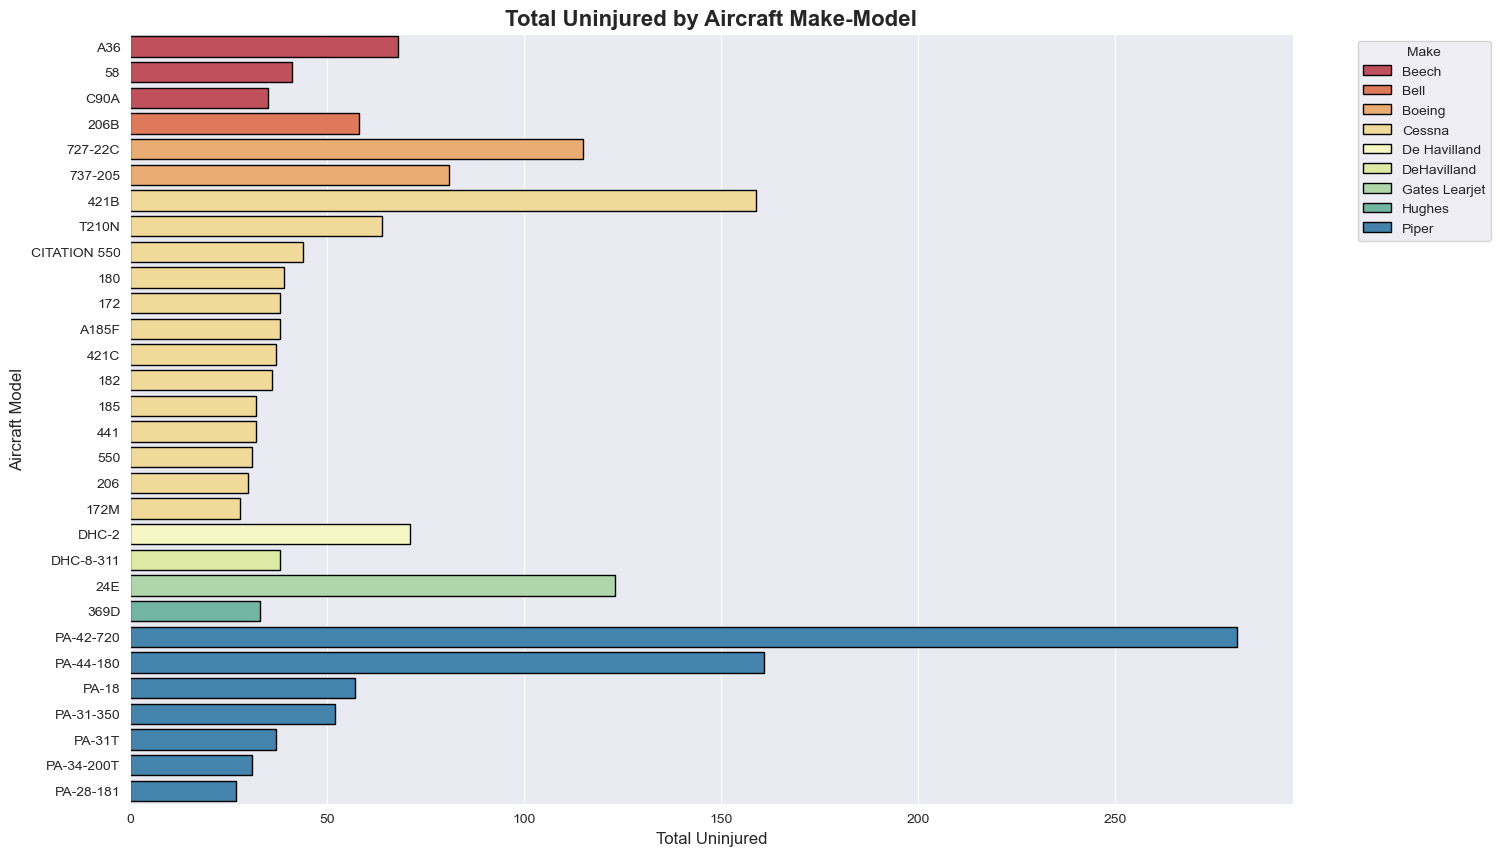

In [29]:
# Apply Seaborn's grid style
sns.set_style("darkgrid")

# Aggregate total uninjured by Make and Model
uninjured_data = df_clean.groupby(["Make", "Model"])["Total.Uninjured"].sum().reset_index()

# Sort first by total uninjured (descending), then alphabetically by Make
uninjured_data = uninjured_data.sort_values(by=["Total.Uninjured"], ascending=False).head(30)
uninjured_data = uninjured_data.sort_values(by=["Make", "Total.Uninjured"], ascending=[True, False])

# Set figure size
plt.figure(figsize=(15, 10))

# Create a distinct color palette for makes
num_makes = uninjured_data["Make"].nunique()
palette = sns.color_palette("Spectral", num_makes)

# Create horizontal barplot
sns.barplot(
    data=uninjured_data, 
    y="Model", 
    x="Total.Uninjured", 
    hue="Make",  
    palette=palette,  
    edgecolor="black",
    dodge=False  # Ensures models of the same make appear one after another
)

# Titles and labels
plt.title("Total Uninjured by Aircraft Make-Model", fontsize=16, fontweight="bold")
plt.xlabel("Total Uninjured", fontsize=12)
plt.ylabel("Aircraft Model", fontsize=12)

# Move legend outside the plot for better visibility
plt.legend(title="Make", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)

# Show plot
plt.show()


there is an issue in the data cleaning phase i assumed the records for the make column were entered with accuracy although there's certain cases whereby data was entered wrong this makes that column inconsistent as you will see in our visualization the legend has two entries that to us look the same althought to the computer "De Havilland" and "DeHavilland" which are being treated as two different makes entirely when really this was a data entry error. we can investigate further using fuzzy string matching to understand further in the make column how many entries were really misentered.

In [30]:
from thefuzz import process

In [31]:
# Get unique makes
unique_makes = df_clean["Make"].unique()

# Set a similarity threshold: 95 means strings must be at least 95% similar)
threshold = 95  

# Create a dictionary to store groups of similar makes
make_groups = {}

# Iterate through unique makes and group similar ones
for make in unique_makes:
    match = process.extractOne(make, make_groups.keys(), score_cutoff=threshold)
    
    if match:
        make_groups[match[0]].append(make)
    else:
        make_groups[make] = [make]

# Display grouped makes that are likely duplicates
for key, group in make_groups.items():
    if len(group) > 1:
        print(f"Group: {group}")


Group: ['Cessna', 'CESSNA']
Group: ['Piper', 'PIPER']
Group: ['Aerospatiale', 'AEROSPATIALE']
Group: ['Mooney', 'MOONEY']
Group: ['Beech', 'BEECH']
Group: ['Bellanca', 'BELLANCA']
Group: ['Mitsubishi', 'MITSUBISHI']
Group: ['Robinson', 'ROBINSON']
Group: ['Bell', 'BELL']
Group: ['Maule', 'MAULE']
Group: ['Hughes', 'HUGHES']
Group: ['Enstrom', 'ENSTROM']
Group: ['De Havilland', 'Dehavilland', 'DeHavilland', 'DEHAVILLAND']
Group: ['Aero Commander', 'AERO COMMANDER']
Group: ['Grumman', 'GRUMMAN']
Group: ['Fairchild', 'FAIRCHILD']
Group: ['Britten-norman', 'BRITTEN-NORMAN']
Group: ['Hiller', 'HILLER']
Group: ['Boeing', 'BOEING']
Group: ['North American', 'NORTH AMERICAN']
Group: ['Learjet', 'LEARJET']
Group: ['Stinson', 'STINSON']
Group: ['Sikorsky', 'SIKORSKY']
Group: ['Gulfstream', 'GULFSTREAM']
Group: ['Champion', 'CHAMPION']
Group: ['Hawker Siddeley', 'Hawker Siddely']
Group: ['Socata', 'SOCATA']
Group: ['Israel Aircraft Industries', 'ISRAEL AIRCRAFT INDUSTRIES']
Group: ['Air Tractor',

now that we have identified all the extremely similar entries we should standardize the make column based on this

In [32]:
# Creating a mapping dictionary using the first value in each group as the standardized name
standardized_makes = {variant: group[0] for group in make_groups.values() for variant in group}

# Apply the mapping to the 'Make' column
df_clean["Make"] = df_clean["Make"].replace(standardized_makes)

now if we run the fuzzy string matching cell again it shouldn't print anything. 

In [ ]:
unique_makes = df_clean["Make"].unique()
threshold = 95  
make_groups = {}

for make in unique_makes:
    match = process.extractOne(make, make_groups.keys(), score_cutoff=threshold)
    
    if match:
        make_groups[match[0]].append(make)
    else:
        make_groups[make] = [make]

for key, group in make_groups.items():
    if len(group) > 1:
        print(f"Group: {group}")

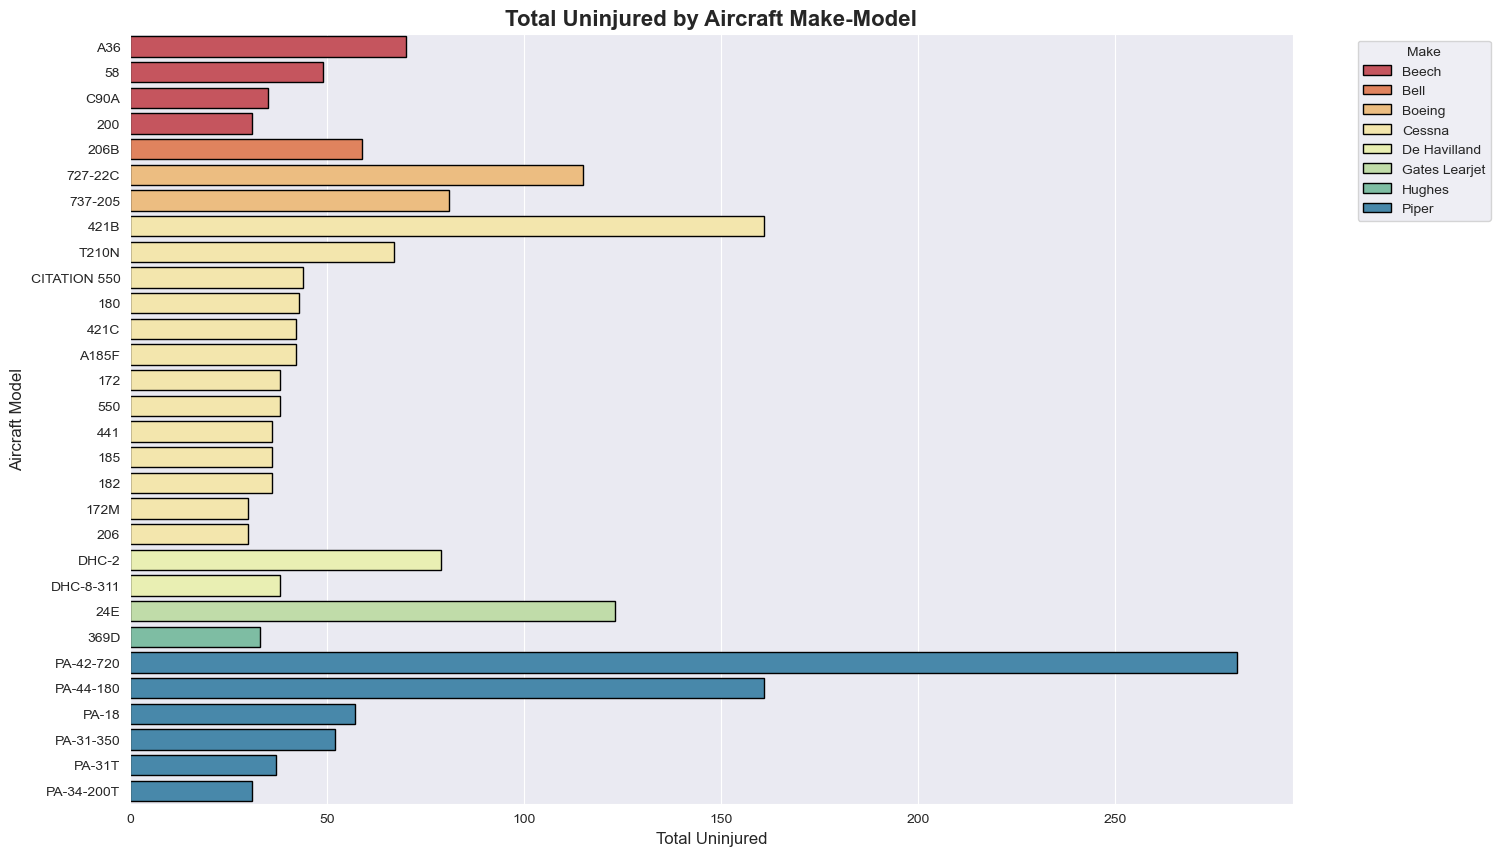

In [34]:
# Apply Seaborn's grid style
sns.set_style("darkgrid")

# Aggregate total uninjured by Make and Model
uninjured_data = df_clean.groupby(["Make", "Model"])["Total.Uninjured"].sum().reset_index()

# Sort first by total uninjured (descending), then alphabetically by Make
uninjured_data = uninjured_data.sort_values(by=["Total.Uninjured"], ascending=False).head(30)
uninjured_data = uninjured_data.sort_values(by=["Make", "Total.Uninjured"], ascending=[True, False])

# Set figure size
plt.figure(figsize=(15, 10))

# Create a distinct color palette for makes
num_makes = uninjured_data["Make"].nunique()
palette = sns.color_palette("Spectral", num_makes)

# Create horizontal barplot
sns.barplot(
    data=uninjured_data, 
    y="Model", 
    x="Total.Uninjured", 
    hue="Make",  
    palette=palette,  
    edgecolor="black",
    dodge=False  # Ensures models of the same make appear one after another
)

# Titles and labels
plt.title("Total Uninjured by Aircraft Make-Model", fontsize=16, fontweight="bold")
plt.xlabel("Total Uninjured", fontsize=12)
plt.ylabel("Aircraft Model", fontsize=12)

# Move legend outside the plot for better visibility
plt.legend(title="Make", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)

# Show plot
plt.show()


## 【4】 *Business Recommendations*

## 📌 Conclusion
